In [1]:
import gradio as gr
from agentic.nodes import WorkflowState
from agentic.graph import VehicleChat, workflow_app

from IPython.display import Image, display
# from app import workflow_app
import sqlite3
import pandas as pd
import json

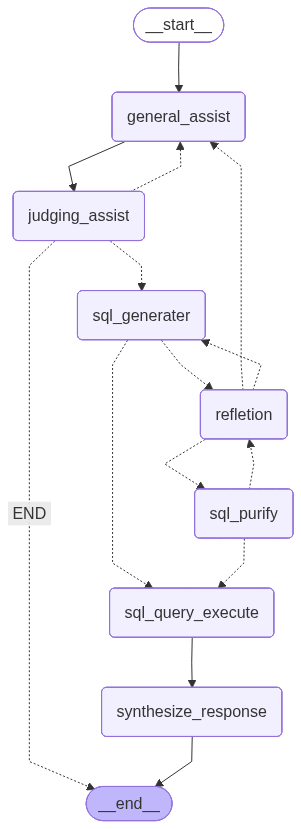

In [2]:
graph = await workflow_app()
display(Image(graph.get_graph().draw_mermaid_png()))

In [5]:
q = "SELECT * FROM vehicles WHERE year = '2022' and brand = 'Toyota'"
q = "SELECT * FROM vehicles WHERE year = '2020' and brand = 'Ford'"
q = "SELECT * FROM vehicles WHERE fuel_type = 'gasoline'"
# q = "SELECT * FROM vehicles WHERE LOWER(brand) = 'toyota' AND LOWER(model) = 'tacoma' AND year = 2022 AND LOWER(fuel_type) = 'gasoline' AND price BETWEEN 50000 AND 60000; "
# q = "SELECT * FROM vehicles WHERE LOWER(brand) = 'honda' AND LOWER(model) = 'cr-v' AND year = 2020 AND LOWER(fuel_type) = 'gasoline' AND price BETWEEN 15000 AND 30000;"
# q = "SELECT * FROM vehicles WHERE LOWER(brand) = 'kia' AND LOWER(model) = 'sportage' AND year = 2015 AND LOWER(fuel_type) = 'gasoline' AND price BETWEEN 12000 AND 50000 AND price IS NOT NULL "
# q = "SELECT * FROM vehicles WHERE id in (763, 742, 501 ) "
# q = "SELECT * FROM vehicles WHERE LOWER(brand) = 'subaru' AND LOWER(model) = 'forester' AND year = 2025 AND LOWER(engine_type) = 'gasoline' AND LOWER(fuel_type) = 'gasoline' AND price BETWEEN 15000 AND 50000"

# q = "SELECT * FROM vehicles WHERE LOWER(brand) = 'jeep' AND LOWER(model) = 'grand cherokee' AND year = 2016 AND LOWER(engine_type) = 'gasoline' AND price BETWEEN 17000 AND 50000"
# q = "SELECT * FROM vehicles WHERE LOWER(brand) LIKE 'nissan' AND LOWER(model) LIKE 'altaima' AND year = 2016 AND LOWER(fuel_type) LIKE 'gasoline'"

q = "SELECT * FROM vehicles WHERE brand = 'Toyota'"
conn = sqlite3.connect("data/cars.db")
rs = pd.read_sql_query(q, conn)
print(rs)


      id   brand       model  year engine_type fuel_type   color   mileage  \
0  20590  Toyota       Camry  2019    inline_6  gasoline  Silver   39073.8   
1  20612  Toyota  Highlander  2017    inline_4    diesel   Beige  116173.8   
2  20621  Toyota      Tacoma  2019          v6  gasoline    Blue  104921.5   
3  20654  Toyota       Camry  2016    inline_4    diesel   Brown   35946.2   
4  20673  Toyota  Highlander  2015    inline_6  gasoline   Green  102842.4   

   number_of_doors transmission     price  
0                2          cvt  24138.93  
1                4       manual  13750.00  
2                4    automatic  15000.00  
3                2       manual  21532.06  
4                4    automatic  12500.00  


In [ ]:
q = "SELECT * FROM vehicles WHERE LOWER(brand) LIKE 'nissan' AND LOWER(model) LIKE 'altaima' AND year = 2016 AND LOWER(fuel_type) LIKE 'gasoline'"

conn = sqlite3.connect("data/cars.db")
rs = pd.read_sql_query(q, conn)
print(rs)

In [ ]:
t = [1, 3, 5, 7]
x = len(t)+1
print(x)
print(t[x:])

In [ ]:
import json
from pydantic import BaseModel, Field

class GeneralResult(BaseModel):
    answers: str = Field(description="< The information to perform a meaningful search>")
    confidence: str = Field(description="< Here detailed classification of the confidence level of answer: High, Medium, or Low >")
    
class SearchJudgeResult(BaseModel):
    decision: str = Field( description=" Here the final decision whether to 'PRO' or 'REQ'")
    summary: str = Field( description="Here the essential details information (e.g., brand, Model, Year, Price)")
    issues_detected: str = Field( description= " Here the detailed missing or ambiguous information or fields ")
    confidence: str = Field(description="Here detailed classification of the confidence level of answer: High, Medium, or Low")
    
t1="""{
    "decision": "REQ or POS"
    "summary": "brand(undefined), model(undefined), Year Range(undefined), Price Range(undefined)",
    "issues_detected": "The brand, model, year range, and price range are all missing - these are essential information required for a vehicle search",
    "confidence": "Low"
}"""

t2 = """{
            "answers": "here is the minimum information to perform a meaningful search such as brand, Model, Year), Price",
            "confidence": "here detailed classification of the confidence level of response: High, Medium, or Low"
        }"""
            
# tt = json.loads(t)

# print(tt)

vehicle = SearchJudgeResult.model_validate_json(t1)
# general = GeneralResult.model_validate_json(t2)

print(f" general: {general} or \n vehicle: {vehicle} ")

In [ ]:
def get_schema(db_path: str) -> str:
    """
    Return only the schema that the agent should use: 'transactions' table.
    """
    conn = sqlite3.connect("data/cars.db")
    cur = conn.cursor()
    cur.execute("PRAGMA table_info(transactions)")
    rows = cur.fetchall()
    conn.close()
    return "table name: transactions\n" + "\n".join([f"{r[1]} ({r[2]})" for r in rows])

In [ ]:
table_name = "vehicles"
conn = sqlite3.connect("data/cars.db")
cur = conn.cursor()
cur.execute(f"PRAGMA table_info({table_name})")
rows = cur.fetchall()
conn.close()
print( f"table name: {table_name}\n" + "\n".join([f"{r[1]} ({r[2]})" for r in rows]))

In [ ]:
vs = []

if vs:
    print("1")

In [ ]:
graph = await workflow_app()
display(Image(graph.draw_mermaid_png()))

In [ ]:
vehicleChat = VehicleChat()

await vehicleChat.setup()
await vehicleChat.build_graph()

graph =  vehicleChat.graph

# display(Image(vehicleChat.graph.draw_mermaid_png()))

display(Image(graph.draw_mermaid_png()))

In [ ]:
def chat(user_input: str, history):
    # initial_state = State(messages=[{"role": "user", "content": user_input}])
    initial_state = WorkflowState()
    initial_state["original_query"] = user_input
    result = graph.invoke(initial_state)
    print(result['final_response'])
    return result['final_response']

In [ ]:
gr.ChatInterface(chat, type="messages").launch()

In [ ]:
missing_information = ""
for required_word in ["TT", "BB", "CC", "DD"]:
    missing_information = missing_information + f"'{required_word}',"

print(missing_information)